In [311]:
pip list


Package                            Version    
---------------------------------- -----------
absl-py                            0.7.1      
alabaster                          0.7.12     
anaconda-client                    1.7.2      
anaconda-navigator                 1.9.7      
anaconda-project                   0.8.3      
appnope                            0.1.0      
appscript                          1.0.1      
asn1crypto                         0.24.0     
astor                              0.8.0      
astroid                            2.2.5      
astropy                            3.2.1      
atomicwrites                       1.3.0      
attrs                              19.1.0     
Babel                              2.7.0      
backcall                           0.1.0      
backports.functools-lru-cache      1.5        
backports.os                       0.1.1      
backports.shutil-get-terminal-size 1.0.0      
backports.tempfile                 1.0        
backports.wea

Note: you may need to restart the kernel to use updated packages.


In [312]:
import networkx as nx

In [313]:
%matplotlib inline
import matplotlib.pyplot as plt

In [314]:
import numpy as np

In [315]:
g = nx.Graph()

g.add_edge('A', 'B', weight=4)
g.add_edge('A', 'C', weight=2)
g.add_edge('B', 'C', weight=3)
g.add_edge('B', 'D', weight=1)
g.add_edge('B', 'E', weight=4)
g.add_edge('C', 'D', weight=4)
g.add_edge('C', 'E', weight=5)
g.add_edge('E', 'D', weight=1)
g.add_edge('J', 'L', weight=5)
g.add_edge('D', 'H', weight=9)
g.add_edge('H', 'L', weight=7)
g.add_edge('P', 'L', weight=9)
g.add_edge('P', 'G', weight=4)
g.add_edge('L','G', weight=2)

NameError: name 'predecessors' is not defined

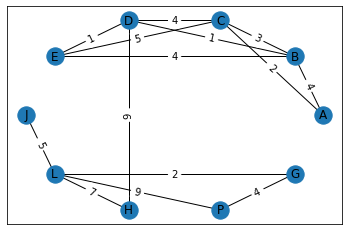

In [310]:
ax = plt.axes()
nx.draw_networkx(
    g, ax=ax,
    pos=nx.shell_layout(g)
)

nx.draw_networkx_edge_labels(
    g, ax=ax, pos=nx.shell_layout(g),
    edge_labels=dict(((u, v), g[u][v]['weight'])
                     for u, v in g.edges)
)

nx.draw_networkx_edges(
        g, ax=ax, pos=nx.shell_layout(g),
        edgelist=[(succ, pred)
                  for pred in predecessors.keys()
                  for succ in predecessors[pred]],
        edge_color='blue',
        width=2
    )

# PRIM ALGO

In [522]:
def prim(g):
    N = [n for n in g.node]
    cheapest = {key:np.inf for key in g.node}
    pred = {key:None for key in g.node}
    
    cheapest[next(iter(cheapest.keys()))] = 0
    
   
    
    while len(N) != 0:
        minimal_cost_node = min(cheapest,key=cheapest.get)
       
        N.remove(minimal_cost_node)
        cheapest.pop(minimal_cost_node)
        
        for n in g.neighbors(minimal_cost_node):
            if n in N:
                if g[minimal_cost_node][n]['weight'] < cheapest[n]:
                    cheapest[n] = g[minimal_cost_node][n]['weight']
                    pred[n] = minimal_cost_node
    
    return pred
    

In [523]:
print(prim(g))

{'A': None, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'D', 'J': 'L', 'L': 'H', 'H': 'D', 'P': 'G', 'G': 'L'}


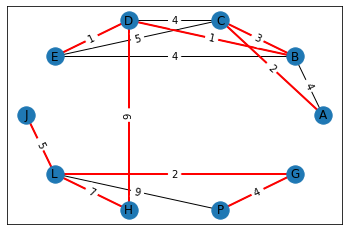

In [524]:
ax = plt.axes()
nx.draw_networkx(
    g, ax=ax,
    pos=nx.shell_layout(g)
)

nx.draw_networkx_edge_labels(
    g, ax=ax, pos=nx.shell_layout(g),
    edge_labels=dict(((u, v), g[u][v]['weight'])
                     for u, v in g.edges)
)

prim_result = prim(g)
prim_result['A'] = 'A'
nx.draw_networkx_edges(
        g, ax=ax, pos=nx.shell_layout(g),
        
        edgelist=[(succ, pred)
                  for pred in prim_result.keys()
                  for succ in prim_result[pred]],
        edge_color='red',
        width=2
    )

In [150]:
def animate(i):

    nx.draw_networkx_edges(
        g, ax=ax, pos=nx.shell_layout(g),
        edgelist=[(succ, pred)
                  for pred in predecessors.keys()
                  for succ in predecessors[pred]],
        edge_color='blue',
        width=2
    )
    return []


inf

In [369]:
g.edges.data('weight')

EdgeDataView([('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 3), ('B', 'D', 1), ('B', 'E', 4), ('C', 'D', 4), ('C', 'E', 5), ('D', 'E', 1), ('D', 'H', 9), ('J', 'L', 5), ('L', 'H', 7), ('L', 'P', 9), ('L', 'G', 2), ('P', 'G', 4)])

# KRUSKAL

In [527]:
class UnionFind:
    def __init__(self,nodes):
        self.root = {i:i for i in nodes}
        
    def union(self,u,v):
        root_u = self.find(u)
        root_v = self.find(v)
        
        if root_u != root_v:
            self.root[root_v] = root_u
        
    
    def find(self,u):
        while self.root[u] != u:
            u = self.root[u]
        
        return u

In [528]:
def kruskal(g):
    mst = []
    edges = sorted(g.edges.data('weight'), key = lambda edges: edges[2])
    make_union_find = UnionFind(g.nodes)
    while len(edges) != 0:
        e = edges[0]
        edges.remove(e)        
        if make_union_find.find(e[0]) != make_union_find.find(e[1]):
            make_union_find.union(e[0],e[1])
            mst.append(e)
    
    return mst
        
    

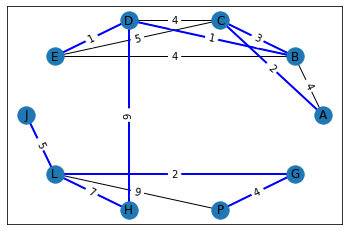

In [529]:
ax = plt.axes()
nx.draw_networkx(
    g, ax=ax,
    pos=nx.shell_layout(g)
)

nx.draw_networkx_edge_labels(
    g, ax=ax, pos=nx.shell_layout(g),
    edge_labels=dict(((u, v), g[u][v]['weight'])
                     for u, v in g.edges)
)

kruskal_result = kruskal(g)
nx.draw_networkx_edges(
        g, ax=ax, pos=nx.shell_layout(g),
        
        edgelist=[(e[1],e[0]) for e in kruskal_result],
        edge_color='blue',
        width=2
    )